## Installing the needed libraries

In [ ]:
!pip install datasets
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requ

## Importing the nominal libraries of python which may or will be needed i further analysis of the dataset in finding and visualization of the dataset insights.

In [ ]:
import numpy as nmpy #By using alias nmpy we are importing the python library numpy
import pandas as pndas #By using alias pndas we are importing the python library pandas
import matplotlib.pyplot as mtplot #By using alias mtplot we are importing the python library matplotlib
import seaborn as sborn #By using alias sborn we are importing the python library seaborn
import re #Regular expression operations
import nltk #Natural Language Toolkit
from nltk.corpus import stopwords #stopwords is imported from the python library named nltk.corpus
from nltk.tokenize import word_tokenize #word_tokenize is imported from the python library named nltk.tokenize
from nltk.stem import WordNetLemmatizer #WordNetLemmatizer is imported from the python library named nltk.stem
from collections import Counter #Counter is imported from the python library named collections
from wordcloud import WordCloud #WordCloud is imported from the python library named wordcloud
import tensorflow as tf #TensorFlow is imported
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification #DistilBertTokenizer and TFDistilBertForSequenceClassification are imported from the python library named transformers
from sklearn.model_selection import train_test_split #train_test_split is imported from the python library named sklearn.model_selection
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc,confusion_matrix #metrics are imported from the python library named sklearn.metrics
from sklearn.preprocessing import label_binarize #label_binarize is imported from the python library named sklearn.preprocessing

### Reading the dataset from the website

In [ ]:
splits = {'train': 'train.csv', 'test': 'test.csv'}
Ashn_dtst_llm = pndas.read_csv("hf://datasets/Ateeqq/AI-and-Human-Generated-Text/" + splits["train"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


## Dataset Description and informations

In [ ]:
Ashn_dtst_llm.shape

(22930, 3)

In [ ]:
Ashn_dtst_llm.head()

,title,abstract,label
0,Epigenetic inheritance of circadian period in ...,\n\nThis study focuses on the epigenetic inher...,1
1,Pediatric Airway Stent Designed to Facilitate ...,Objective: The goal was to develop a pediatric...,0
2,Infection prevention and control in paediatric...,Transmission of infection in the paediatric of...,0
3,"Correlation between thyroid function, testoste...",STUDY DESIGN: Prospective case series. OBJECTI...,0
4,Natural intertypic and intratypic recombinants...,\n\nThis study aims to analyze the recombinant...,1


### Concatenating the 'title' and 'abstract' Columns as 'text' Column

In [ ]:
# Concat title and abstract as text

Ashn_dtst_llm['text'] = Ashn_dtst_llm['title'] + Ashn_dtst_llm['abstract']
Ashn_dtst_llm.head()


,title,abstract,label,text
0,Epigenetic inheritance of circadian period in ...,\n\nThis study focuses on the epigenetic inher...,1,Epigenetic inheritance of circadian period in ...
1,Pediatric Airway Stent Designed to Facilitate ...,Objective: The goal was to develop a pediatric...,0,Pediatric Airway Stent Designed to Facilitate ...
2,Infection prevention and control in paediatric...,Transmission of infection in the paediatric of...,0,Infection prevention and control in paediatric...
3,"Correlation between thyroid function, testoste...",STUDY DESIGN: Prospective case series. OBJECTI...,0,"Correlation between thyroid function, testoste..."
4,Natural intertypic and intratypic recombinants...,\n\nThis study aims to analyze the recombinant...,1,Natural intertypic and intratypic recombinants...


In [ ]:
Ashn_dtst_llm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22930 entries, 0 to 22929
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     22930 non-null  object
 1   abstract  22930 non-null  object
 2   label     22930 non-null  int64 
 3   text      22930 non-null  object
dtypes: int64(1), object(3)
memory usage: 716.7+ KB


In [ ]:
Ashn_dtst_llm.duplicated().sum()

0

In [ ]:
Ashn_dtst_llm['label'].unique()

array([1, 0])

## Preprocessing and cleaning train data

#### This code downloads necessary NLTK data for text processing, including tokenizrs, stopword, and lematizers. It defines a preprocess_text function to clean and process text data by removing punctuasion, stop words, and applying lematisation and lowercasing. The function is then applied to text data from two CSV files—train and test datasets—concatnated from 'title' and 'abstract' columns into a new 'text' column. Finally, it pre-processes the training data by removing stop words, lemmatising tokens, and converting them to lower-case. The nltk.download('wordnet') line is redundnt as it's already downloaded at the start.

In [ ]:
# Download necessary NLTK data for text processing
nltk.download('punkt')       # For tokenization
nltk.download('stopwords')   # For removing stopwords
nltk.download('wordnet')     # For lemmatization

def preprocess_text(df):

    # Initialize lemmatizer and stop words set
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    # Remove punctuation from the text
    df['Punctuation_free'] = df['text'].astype(str).apply(lambda x: re.sub(r'[^\w\s]', '', x))

    # Remove stop words and tokenize the text
    df['Without Stop Words'] = df['Punctuation_free'].apply(lambda x: [word for word in word_tokenize(x) if word.lower() not in stop_words])

    # Lemmatize the tokens
    df['lemmatized_tokens'] = df['Without Stop Words'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

    # Convert tokens to a single lowercase string
    df['Lower case'] = df['lemmatized_tokens'].apply(lambda x: ' '.join(x).lower())

    return df

# Define file paths for training and test datasets
splits = {'train': 'train.csv', 'test': 'test.csv'}
train_path = "hf://datasets/Ateeqq/AI-and-Human-Generated-Text/" + splits["train"]
test_path = "hf://datasets/Ateeqq/AI-and-Human-Generated-Text/" + splits["test"]

# Load the datasets from the specified paths
Ashn_dtst_llm = pndas.read_csv(train_path)
Ashn_dtst_llm_test = pndas.read_csv(test_path)

# Concatenate title and abstract into a single 'text' column
Ashn_dtst_llm['text'] = Ashn_dtst_llm['title'] + ' ' + Ashn_dtst_llm['abstract']
Ashn_dtst_llm_test['text'] = Ashn_dtst_llm_test['title'] + ' ' + Ashn_dtst_llm_test['abstract']

# Apply preprocessing to the training dataset
text = preprocess_text(Ashn_dtst_llm[['text', 'label']].copy())

# Download 'wordnet' data if not already downloaded (repeated call)
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
text.head()

,text,label,Punctuation_free,Without Stop Words,lemmatized_tokens,Lower case
0,Epigenetic inheritance of circadian period in ...,1,Epigenetic inheritance of circadian period in ...,"[Epigenetic, inheritance, circadian, period, c...","[Epigenetic, inheritance, circadian, period, c...",epigenetic inheritance circadian period clonal...
1,Pediatric Airway Stent Designed to Facilitate ...,0,Pediatric Airway Stent Designed to Facilitate ...,"[Pediatric, Airway, Stent, Designed, Facilitat...","[Pediatric, Airway, Stent, Designed, Facilitat...",pediatric airway stent designed facilitate muc...
2,Infection prevention and control in paediatric...,0,Infection prevention and control in paediatric...,"[Infection, prevention, control, paediatric, o...","[Infection, prevention, control, paediatric, o...",infection prevention control paediatric office...
3,"Correlation between thyroid function, testoste...",0,Correlation between thyroid function testoster...,"[Correlation, thyroid, function, testosterone,...","[Correlation, thyroid, function, testosterone,...",correlation thyroid function testosterone leve...
4,Natural intertypic and intratypic recombinants...,1,Natural intertypic and intratypic recombinants...,"[Natural, intertypic, intratypic, recombinants...","[Natural, intertypic, intratypic, recombinant,...",natural intertypic intratypic recombinant ente...


## Preprocessing on test data

In [ ]:
# Apply preprocessing
Procesd_txt_tst_dta = preprocess_text(Ashn_dtst_llm_test[['text', 'label']].copy())

In [ ]:
Procesd_txt_tst_dta.head()

,text,label,Punctuation_free,Without Stop Words,lemmatized_tokens,Lower case
0,Ionizing Radiation Exposure in NICUThe authors...,0,Ionizing Radiation Exposure in NICUThe authors...,"[Ionizing, Radiation, Exposure, NICUThe, autho...","[Ionizing, Radiation, Exposure, NICUThe, autho...",ionizing radiation exposure nicuthe author pro...
1,Drug screening with human SMN2 reporter identi...,1,Drug screening with human SMN2 reporter identi...,"[Drug, screening, human, SMN2, reporter, ident...","[Drug, screening, human, SMN2, reporter, ident...",drug screening human smn2 reporter identifies ...
2,Economic burden of pneumococcal infections in ...,1,Economic burden of pneumococcal infections in ...,"[Economic, burden, pneumococcal, infections, c...","[Economic, burden, pneumococcal, infection, ch...",economic burden pneumococcal infection child 5...
3,What to do when your technology is good but a ...,1,What to do when your technology is good but a ...,"[technology, good, licence, terminated, articl...","[technology, good, licence, terminated, articl...",technology good licence terminated article exa...
4,"The essential role of fructose-1,6-bisphosphat...",0,The essential role of fructose16bisphosphatase...,"[essential, role, fructose16bisphosphatase, 2,...","[essential, role, fructose16bisphosphatase, 2,...",essential role fructose16bisphosphatase 2 enzy...


## Visualization of the dataset

### Word Cloud

#### This code defines a function plot_word_cloud that genrates and display a word cloud from a series of text data. It concatnates all texts, creates a word cloud with specified setting (width, height, color), and then plots it using Matplot-lib, including a customisable title.

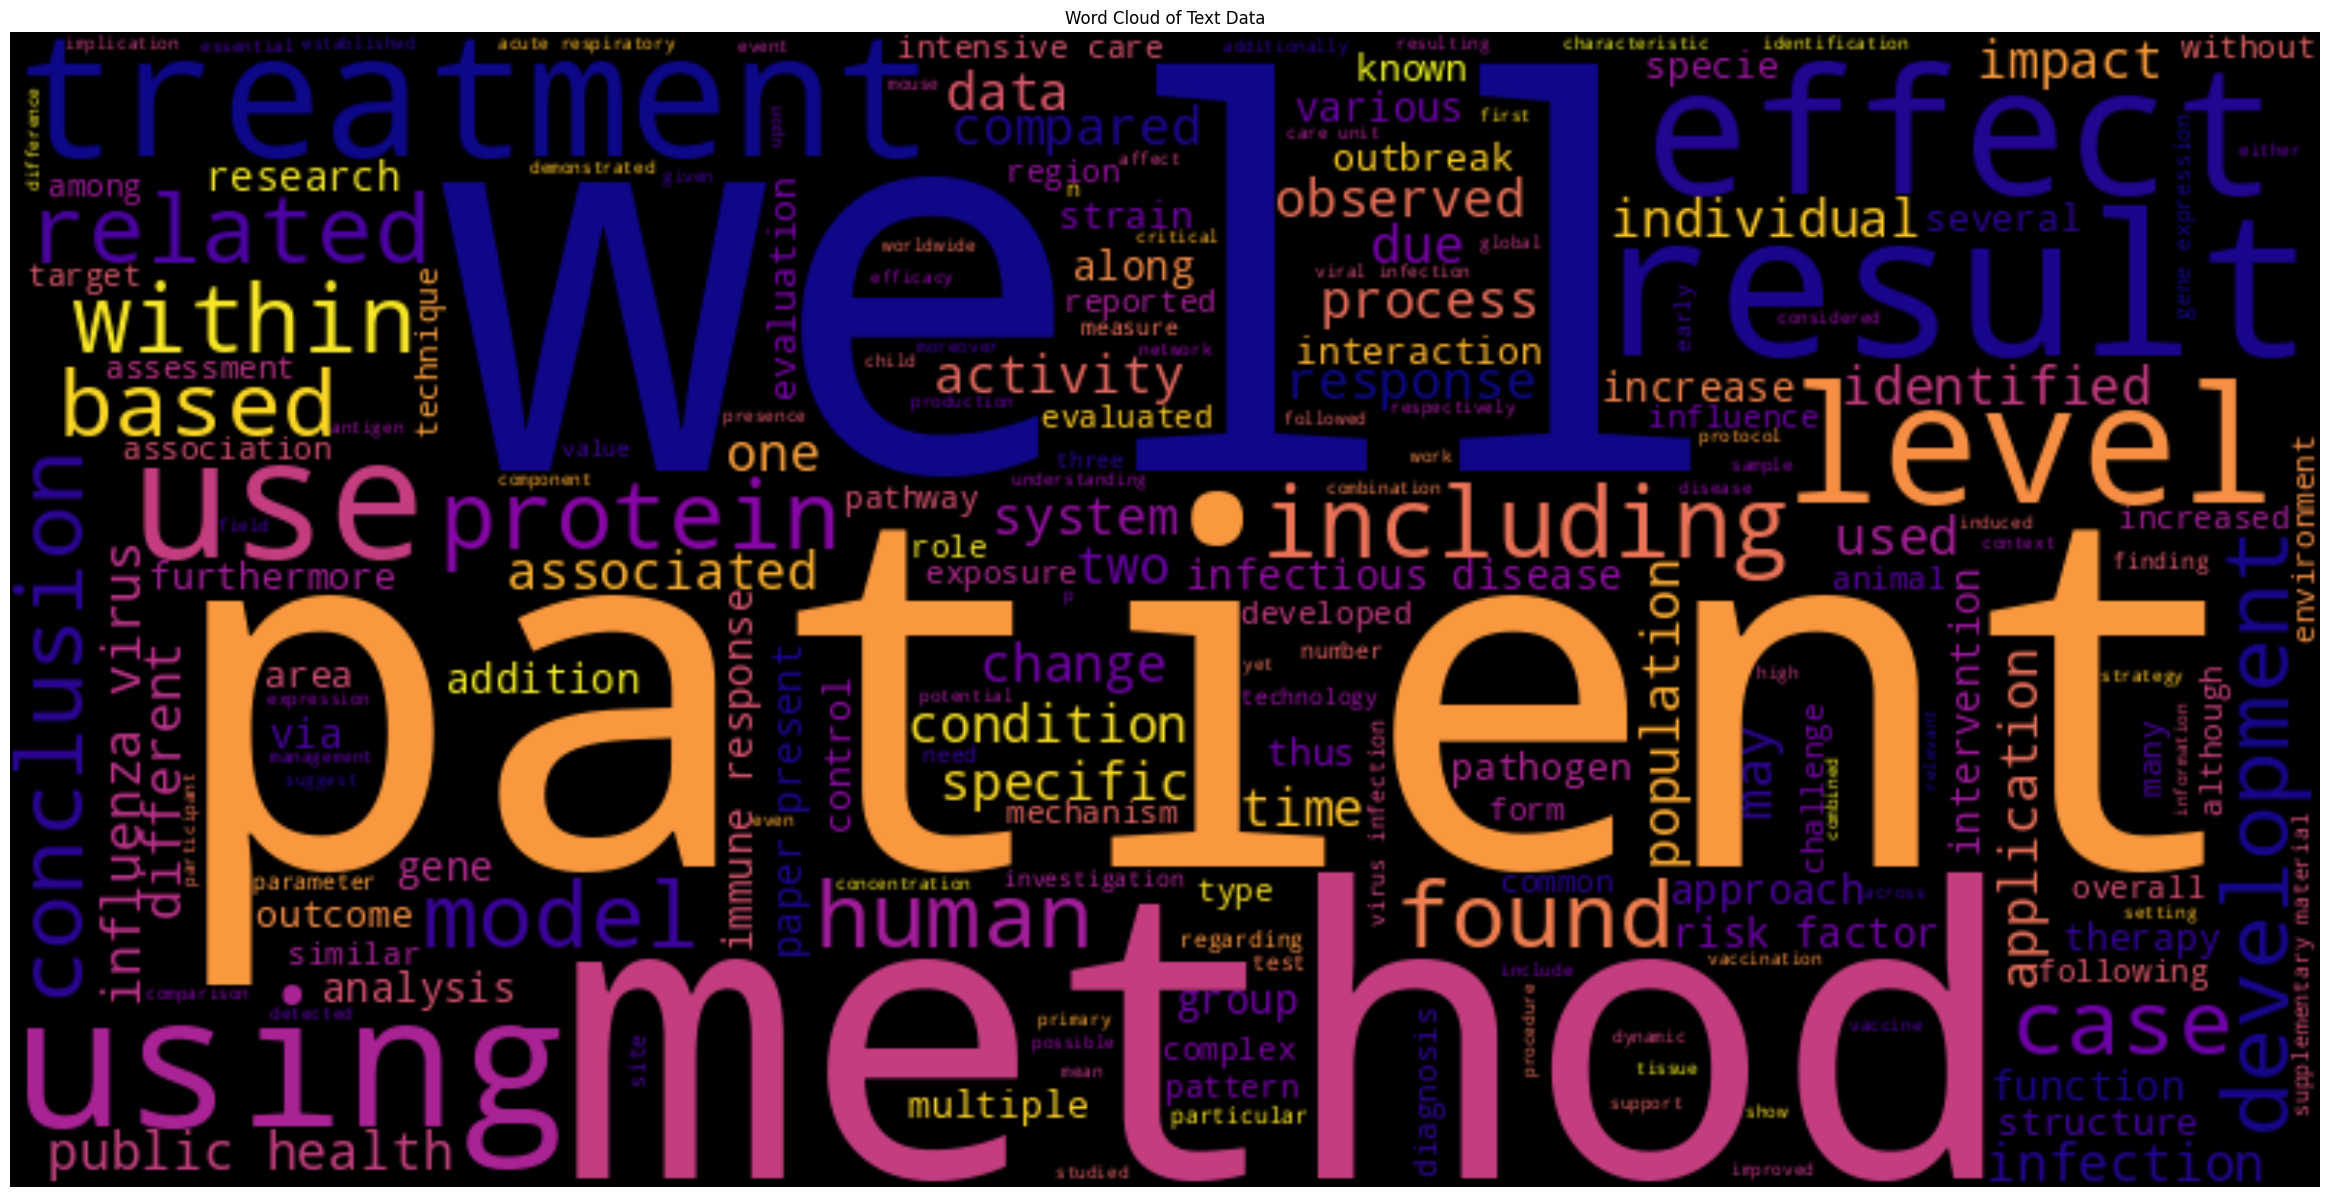

In [ ]:
def plot_word_cloud(text_series, width=800, height=400, background_color='black', colormap='plasma', title='Word Cloud of Text Data', title_fontsize=120):
    # Join all texts into a single string
    all_text = " ".join(text_series)

    # Generate word cloud
    wordcloud = WordCloud(width=width, height=height, background_color=background_color, colormap=colormap).generate(all_text)

    # Plot the word cloud
    mtplot.figure(figsize=(40, 15))
    mtplot.imshow(wordcloud, interpolation='bilinear')
    mtplot.axis('off')
    mtplot.title(title)
    mtplot.show()

# Example usage
# Assuming 'text' is your DataFrame and it contains a column named 'Lower case'
plot_word_cloud(text['Lower case'])


### Word Frequency Plot

#### This code defines the Top_10_words function to visualize the ten most frequent words in a text. It tokenize the text, remove stopword, counts word frequency, and creates a Data-Frame. It then plots the word frequency as a horizontal bar plot using Sea-born and Matplot-lib.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


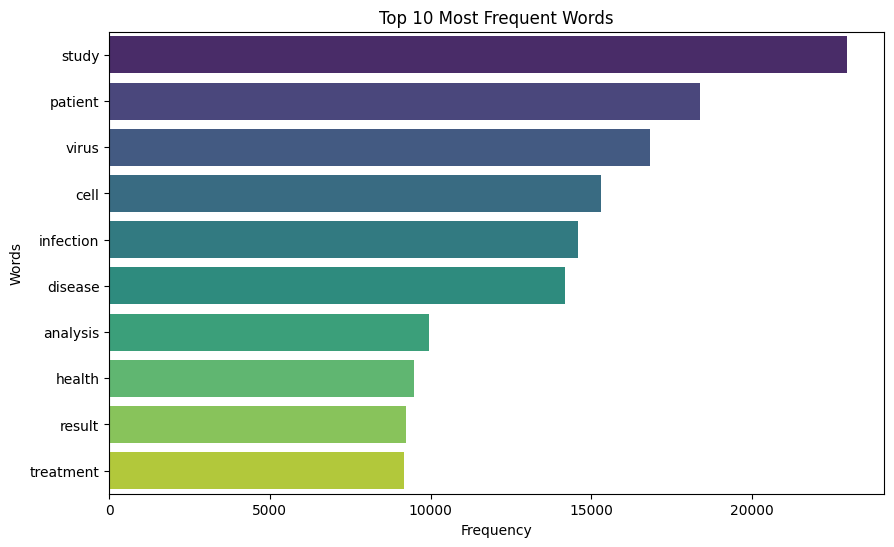

In [ ]:
# Ensure stopwords and tokenizer are downloaded
nltk.download('stopwords')
nltk.download('punkt')

def Top_10_words(text, title='Top 10 Most Frequent Words', figsize=(10, 6), palette='viridis'):

    # Tokenize and remove stopwords
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    # Get word frequencies
    word_freq = Counter(filtered_tokens)
    common_words = word_freq.most_common(10)  # Get the 10 most common words

    # Convert to DataFrame for plotting
    word_freq_df = pndas.DataFrame(common_words, columns=['Word', 'Frequency'])

    # Plot the word frequencies
    mtplot.figure(figsize=figsize)
    sborn.barplot(x='Frequency', y='Word', data=word_freq_df, palette=palette,hue = 'Word',legend=False)
    mtplot.title(title)
    mtplot.xlabel('Frequency')
    mtplot.ylabel('Words')
    mtplot.show()

# Define all_text
all_text = " ".join(text['Lower case'])

# Example usage
Top_10_words(all_text)


### Average Word Length

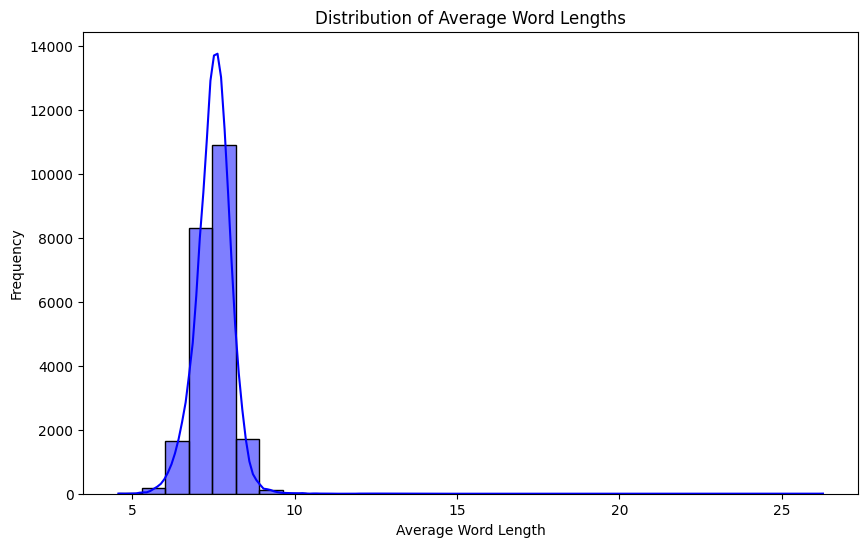

In [ ]:
def avg_word_length(text):

    words = text.split()
    return sum(len(word) for word in words) / len(words) if words else 0

def plot_avg_word_length_distribution(text_series, plot_type='hist', title='Distribution of Average Word Lengths', figsize=(10, 6)):

    # Calculate average word length for each text
    text_series = text_series.apply(avg_word_length)

    # Create plot
    mtplot.figure(figsize=figsize)

    if plot_type == 'hist':
        sborn.histplot(text_series, bins=30, kde=True, color='blue')
        mtplot.title(title)
        mtplot.xlabel('Average Word Length')
        mtplot.ylabel('Frequency')
    elif plot_type == 'kde':
        sborn.kdeplot(text_series, color='green')
        mtplot.title(title)
        mtplot.xlabel('Average Word Length')
        mtplot.ylabel('Density')
    else:
        raise ValueError("Invalid plot type. Choose 'hist' or 'kde'.")

    mtplot.show()

# Example usage
plot_avg_word_length_distribution(text['Lower case'], plot_type='hist')


### Unique Word Count

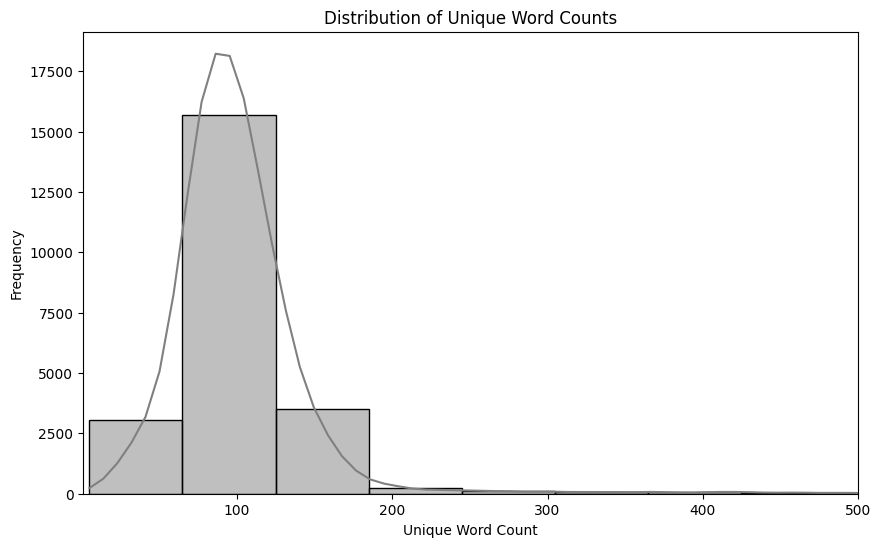

In [ ]:
def unique_word_count(text):

    words = text.split()
    return len(set(words))

def plot_unique_word_count_distribution(text_series, plot_type='hist', title='Distribution of Unique Word Counts', figsize=(10, 6),xlim=(1,500)):

    # Calculate unique word count for each text
    unique_counts = text_series.apply(unique_word_count)

    # Create plot
    mtplot.figure(figsize=figsize)

    if plot_type == 'hist':
        sborn.histplot(unique_counts, bins=30, kde=True, color='grey')
        mtplot.title(title)
        mtplot.xlabel('Unique Word Count')
        mtplot.ylabel('Frequency')
        # Set x-axis limit if provided
        if xlim:
            mtplot.xlim(xlim)

    mtplot.show()

# Example usage
# Assuming 'text' is your DataFrame and it contains a column named 'Lower case'
plot_unique_word_count_distribution(text['Lower case'], plot_type='hist')  # Change 'box' to 'hist' for a histogram


In [ ]:
processed_text = text['lemmatized_tokens']

In [ ]:
processed_text.head()

,lemmatized_tokens
0,"[Epigenetic, inheritance, circadian, period, c..."
1,"[Pediatric, Airway, Stent, Designed, Facilitat..."
2,"[Infection, prevention, control, paediatric, o..."
3,"[Correlation, thyroid, function, testosterone,..."
4,"[Natural, intertypic, intratypic, recombinant,..."


In [ ]:
text.columns

Index(['text', 'label', 'Punctuation_free', 'Without Stop Words',
       'lemmatized_tokens', 'Lower case'],
      dtype='object')

### Distribution of Labels

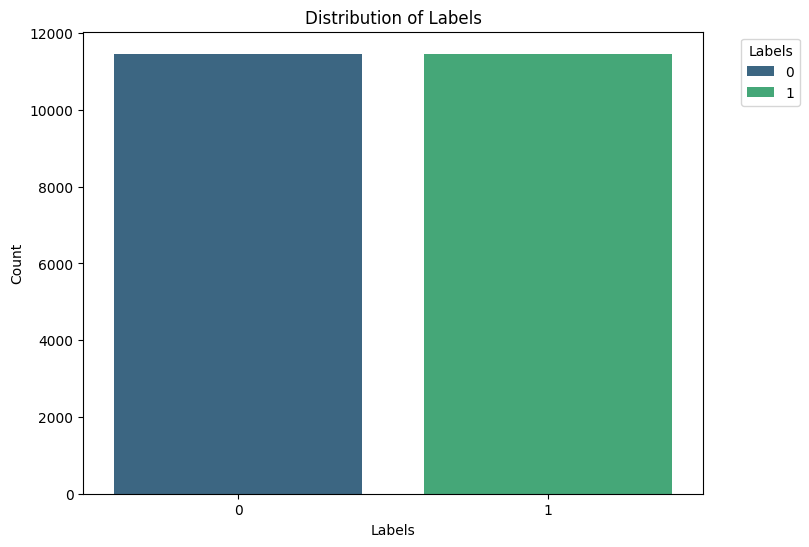

In [ ]:
def plot_label_distribution(data, palette_name="viridis"):

    # Get a list of colors from the specified colormap
    palette = sborn.color_palette(palette_name, n_colors=len(data['label'].unique()))  # Get a discrete palette

    mtplot.figure(figsize=(8, 6))
    sborn.countplot(x='label', data=data, palette=palette, hue='label')
    mtplot.title('Distribution of Labels')
    mtplot.xlabel('Labels')
    mtplot.ylabel('Count')
    mtplot.legend(title='Labels', bbox_to_anchor=(1.05, 1), loc='upper left')
    mtplot.show()

# Example usage
plot_label_distribution(text, palette_name="viridis")

In [ ]:
Procesd_txt_tst_dta.head(5)

,text,label,Punctuation_free,Without Stop Words,lemmatized_tokens,Lower case
0,Ionizing Radiation Exposure in NICUThe authors...,0,Ionizing Radiation Exposure in NICUThe authors...,"[Ionizing, Radiation, Exposure, NICUThe, autho...","[Ionizing, Radiation, Exposure, NICUThe, autho...",ionizing radiation exposure nicuthe author pro...
1,Drug screening with human SMN2 reporter identi...,1,Drug screening with human SMN2 reporter identi...,"[Drug, screening, human, SMN2, reporter, ident...","[Drug, screening, human, SMN2, reporter, ident...",drug screening human smn2 reporter identifies ...
2,Economic burden of pneumococcal infections in ...,1,Economic burden of pneumococcal infections in ...,"[Economic, burden, pneumococcal, infections, c...","[Economic, burden, pneumococcal, infection, ch...",economic burden pneumococcal infection child 5...
3,What to do when your technology is good but a ...,1,What to do when your technology is good but a ...,"[technology, good, licence, terminated, articl...","[technology, good, licence, terminated, articl...",technology good licence terminated article exa...
4,"The essential role of fructose-1,6-bisphosphat...",0,The essential role of fructose16bisphosphatase...,"[essential, role, fructose16bisphosphatase, 2,...","[essential, role, fructose16bisphosphatase, 2,...",essential role fructose16bisphosphatase 2 enzy...


## Assigning the train and test data

In [ ]:
Xtran= text['Lower case'].tolist()
ytst = text['label'].tolist()

In [ ]:
Xtst = Procesd_txt_tst_dta['Lower case'].tolist()
ytst = Procesd_txt_tst_dta['label'].tolist()

## Applying the Distilbert Model

#### This code snippet performs several tasks for training a text classification model using DistilBERT. First, it ensures that the necessary columns ('Lower case' and 'label') are present in the DataFrame. It then loads a pre-trained DistilBERT tokenizer and model for sequence classification from the Hugging Face library. The preprocess_function tokenizes the text data, padding and truncating it to a maximum length of 512 tokens. This tokenized data is then converted into TensorFlow datasets, which are batched with a size of 64. The model is compiled using the Adam optimizer and sparse categorical cross-entropy loss, and trained for 15 epochs. After training, the model is evaluated on the validation set, with the results printed out. Finally, the trained model and tokenizer are saved to a specified directory.

In [ ]:
# Ensure that 'Lower case' and 'label' columns are present in the DataFrame
assert 'Lower case' in text.columns
assert 'label' in text.columns

# Load the pre-trained DistilBERT tokenizer
tokn_zr = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Load the pre-trained DistilBERT model for sequence classification
# Set num_labels to the number of unique labels in the dataset
dstlbrt_mdl = TFDistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=len(text['label'].unique())
)

# Define a function to preprocess and tokenize the text data
def preprocess_function(examples):
    return tokn_zr(examples['Lower case'], truncation=True, padding='max_length')

# Tokenize the training data with truncation and padding
trn_encdngs = tokn_zr(Xtran, truncation=True, padding=True, max_length=512)

# Tokenize the validation data with truncation and padding
vldtn_encdngs = tokn_zr(Xtst, truncation=True, padding=True, max_length=512)

# Convert tokenized training data to TensorFlow dataset format and batch it
trn_dtst = tf.data.Dataset.from_tensor_slices((
    dict(trn_encdngs),  # Tokenized inputs
    ytst                # Training labels
)).batch(64)  # Set batch size for training

# Convert tokenized validation data to TensorFlow dataset format and batch it
vldtn_dtst = tf.data.Dataset.from_tensor_slices((
    dict(vldtn_encdngs),  # Tokenized inputs
    ytst                 # Validation labels
)).batch(64)  # Set batch size for validation

# Compile the model with Adam optimizer, sparse categorical cross-entropy loss, and accuracy metric
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
dstlbrt_mdl.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Train the model for 15 epochs with validation data
history = dstlbrt_mdl.fit(trn_dtst, epochs=15, validation_data=vldtn_dtst)

# Evaluate the model on the validation dataset and print results
eval_results = dstlbrt_mdl.evaluate(vldtn_dtst)
print("Evaluation results:", eval_results)

# Save the trained model and tokenizer to a specified directory
dstlbrt_mdl.save_pretrained('./saved_model')
tokn_zr.save_pretrained('./saved_model')


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/15
359/359 [==============================] - 173s 418ms/step - loss: 0.0910 - accuracy: 0.9622 - val_loss: 0.0084 - val_accuracy: 0.9970
Epoch 2/15
359/359 [==============================] - 148s 412ms/step - loss: 0.0101 - accuracy: 0.9967 - val_loss: 0.0056 - val_accuracy: 0.9979
Epoch 3/15
359/359 [==============================] - 148s 412ms/step - loss: 0.0049 - accuracy: 0.9984 - val_loss: 0.0062 - val_accuracy: 0.9981
Epoch 4/15
359/359 [==============================] - 148s 412ms/step - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.0078 - val_accuracy: 0.9970
Epoch 5/15
359/359 [==============================] - 148s 412ms/step - loss: 0.0037 - accuracy: 0.9988 - val_loss: 0.0137 - val_accuracy: 0.9970
Epoch 6/15
359/359 [==============================] - 148s 412ms/step - loss: 0.0016 - accuracy: 0.9993 - val_loss: 0.0122 - val_accuracy: 0.9974
Epoch 7/15
359/359 [==============================] - 148s 412ms/step - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.0092 -

('./saved_model/tokenizer_config.json',
 './saved_model/special_tokens_map.json',
 './saved_model/vocab.txt',
 './saved_model/added_tokens.json')

90/90 [==============================] - 13s 122ms/step


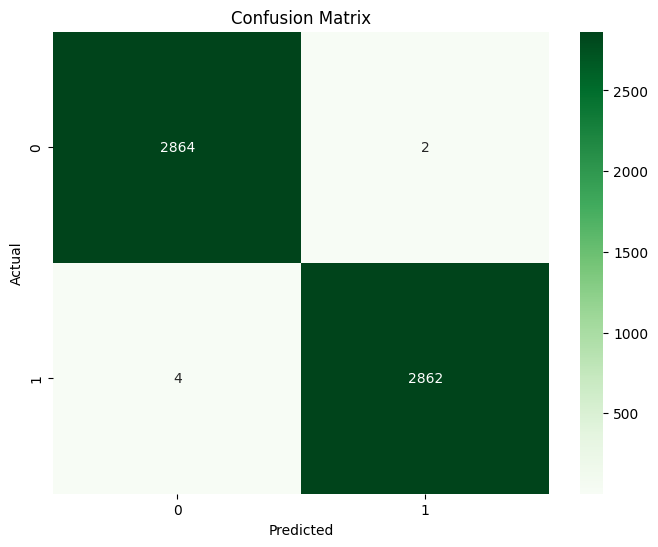

In [ ]:
def plot_confusion_matrix(tru_y, prdctn_y, labels=None, title='Confusion Matrix'):

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(tru_y, prdctn_y, labels=labels)

    # Create a heatmap for the confusion matrix
    mtplot.figure(figsize=(8, 6))
    sborn.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens",
                xticklabels=labels, yticklabels=labels)
    mtplot.title(title)
    mtplot.xlabel("Predicted")
    mtplot.ylabel("Actual")
    mtplot.show()

# Example usage
prdctn_y_probs = dstlbrt_mdl.predict(vldtn_dtst)
prdctn_y = tf.argmax(prdctn_y_probs.logits, axis=1)

# Collect all true labels from the batched dataset
all_val_labels = []
for batch in vldtn_dtst:
    all_val_labels.extend(batch[1].numpy())

# Optionally, specify the labels if you have them
labels = nmpy.unique(all_val_labels)  # or specify your own list of labels

# Use the collected labels for confusion matrix
plot_confusion_matrix(all_val_labels, prdctn_y, labels=labels)

In [ ]:
def calculate_metrics(tru_y, prdctn_y):

  acc = accuracy_score(tru_y, prdctn_y)
  prec = precision_score(tru_y, prdctn_y)
  recal = recall_score(tru_y, prdctn_y)
  f1 = f1_score(tru_y, prdctn_y)

  return {
      "accuracy": acc ,
      "precision": prec,
      "recall": recal,
      "f1_score": f1
  }

In [ ]:
# Calculate metrics
print("Evaluation Metrics for Test set:")
metrics = calculate_metrics(all_val_labels, prdctn_y)

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Evaluation Metrics for Test set:
accuracy: 0.9990
precision: 0.9993
recall: 0.9986
f1_score: 0.9990


In [ ]:
def print_classification_report(tru_y, prdctn_y):

  print(classification_report(tru_y, prdctn_y))

In [ ]:
# Print classification report
print("Classification Report for Test set:")
print_classification_report(all_val_labels, prdctn_y)

Classification Report for Test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2866
           1       1.00      1.00      1.00      2866

    accuracy                           1.00      5732
   macro avg       1.00      1.00      1.00      5732
weighted avg       1.00      1.00      1.00      5732



## Plotting the Learning Curve

#### The plot_learning_curves function visualizes a model's training performance by plotting training and validation loss and accuracy over epochs. It uses Matplotlib to create two subplots: one for loss and one for accuracy, with lines distinguishing between training and validation metrics. This helps in assessing model performance and detecting issues.

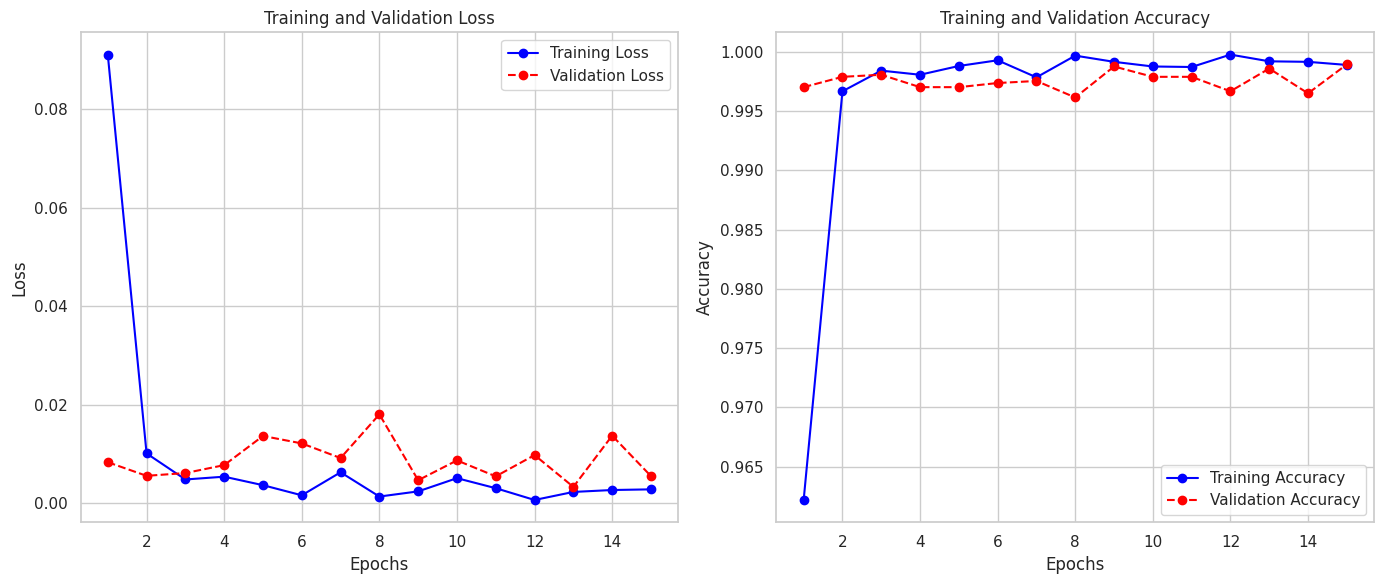

In [ ]:
def plot_learning_curves(history, title_loss='Training and Validation Loss', title_accuracy='Training and Validation Accuracy'):
    # Set the style of the plots using Seaborn for a clean appearance
    sborn.set(style='whitegrid')

    # Extract training and validation loss and accuracy from the history object
    trn_los = history.history['loss']             # Training loss
    vldtn_los = history.history['val_loss']       # Validation loss (correct key is 'val_loss')
    trn_acurcy = history.history['accuracy']      # Training accuracy
    val_acurcy = history.history['val_accuracy']  # Validation accuracy

    # Define the range of epochs
    epochs = range(1, len(trn_los) + 1)

    # Create a figure with two subplots
    mtplot.figure(figsize=(14, 6))

    # Plot the training and validation loss
    mtplot.subplot(1, 2, 1)
    mtplot.plot(epochs, trn_los, 'o-', color='blue', label='Training Loss')      # Plot training loss
    mtplot.plot(epochs, vldtn_los, 'o--', color='red', label='Validation Loss')   # Plot validation loss
    mtplot.title(title_loss)                   # Set title for the loss plot
    mtplot.xlabel('Epochs')                    # Label x-axis as 'Epochs'
    mtplot.ylabel('Loss')                      # Label y-axis as 'Loss'
    mtplot.legend()                           # Display legend
    mtplot.grid(True)                         # Add grid lines

    # Plot the training and validation accuracy
    mtplot.subplot(1, 2, 2)
    mtplot.plot(epochs, trn_acurcy, 'o-', color='blue', label='Training Accuracy')      # Plot training accuracy
    mtplot.plot(epochs, val_acurcy, 'o--', color='red', label='Validation Accuracy')      # Plot validation accuracy
    mtplot.title(title_accuracy)              # Set title for the accuracy plot
    mtplot.xlabel('Epochs')                   # Label x-axis as 'Epochs'
    mtplot.ylabel('Accuracy')                 # Label y-axis as 'Accuracy'
    mtplot.legend()                           # Display legend
    mtplot.grid(True)                         # Add grid lines

    # Adjust layout to prevent overlapping of plots
    mtplot.tight_layout()

    # Display the plots
    mtplot.show()

# Example usage of the function with training history
plot_learning_curves(history)
